In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input,Flatten,Conv2D,Dense,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

2024-08-01 09:35:42.714379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 09:35:42.714512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 09:35:42.859665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df_train.drop(columns="label")
y = df_train["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
X_train.shape

(33600, 784)

In [5]:
X_train = X_train.values.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1) / 255.0
df_test = df_test.values.reshape(-1, 28, 28, 1) / 255.0
y_train = y_train.values

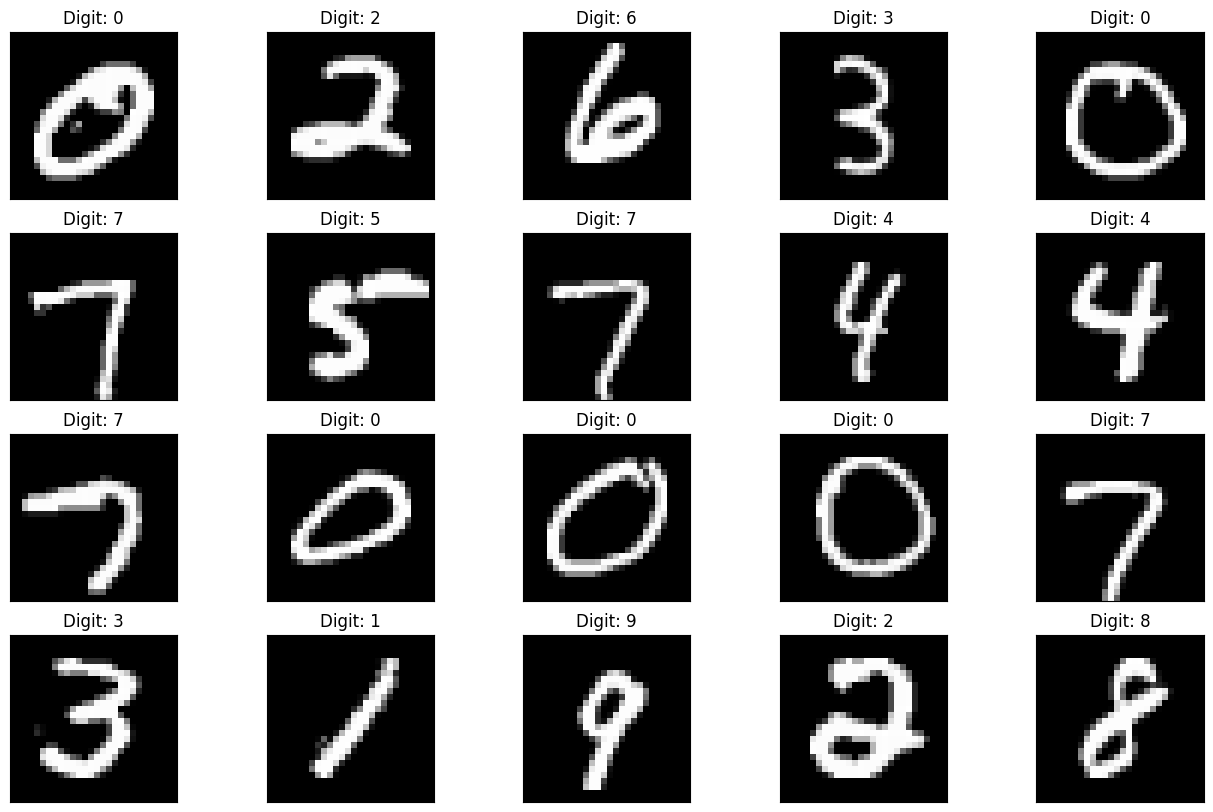

In [6]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

In [7]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [8]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation="relu"),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [9]:
model.compile(
    optimizer='adam', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,234 (735.29 KB)

 Trainable params: 188,234 (735.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.6121 - loss: 1.1217 - val_accuracy: 0.9739 - val_loss: 0.0834
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9276 - loss: 0.2372 - val_accuracy: 0.9811 - val_loss: 0.0549
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9479 - loss: 0.1682 - val_accuracy: 0.9880 - val_loss: 0.0409
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.9599 - loss: 0.1419 - val_accuracy: 0.9893 - val_loss: 0.0366
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9647 - loss: 0.1173 - val_accuracy: 0.9908 - val_loss: 0.0307
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9701 - loss: 0.1044 - val_accuracy: 0.9888 - val_loss: 0.0337
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.9731 - loss: 0.0904 - val_accuracy: 0.9919 - val_loss: 0.0290
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9745 - loss: 0.0916 - 

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9949 - loss: 0.0196
Test accuracy: 0.9942, Test loss: 0.0220


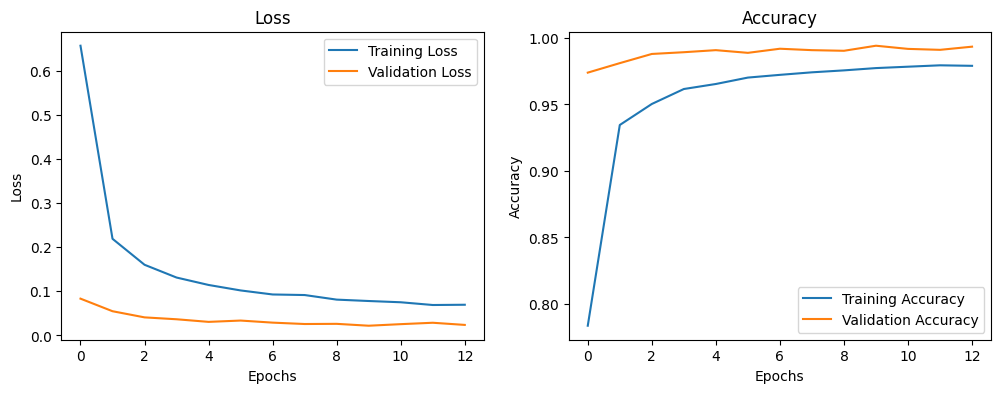

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
predictions = model.predict(df_test)
predicted_labels = np.argmax(predictions, axis=1)
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1), 
    'Label': predicted_labels
})
submission.head()

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [14]:
submission.to_csv('submission.csv', index=False)